In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [16]:
data_train = pd.read_csv('./mnist_train_small.csv', header=None)
data_test = pd.read_csv('./mnist_test.csv', header=None)

In [17]:
x_train = data_train.drop(columns=0)
y_train = data_train[0]

x_test = data_test.drop(columns=0);
y_test = data_test[0]

In [18]:
print(x_train.shape)
print(x_test.shape)

(20000, 784)
(10000, 784)


In [19]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [20]:
modelo = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(784)),
    tf.keras.layers.Dense(16, activation='sigmoid'),
    tf.keras.layers.Dense(16, activation='sigmoid'),
    tf.keras.layers.Dense(10)
])

In [21]:
modelo.compile(optimizer='sgd',
               loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
               metrics=['accuracy'])

In [22]:
modelo.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 16)                12560     
                                                                 
 dense_4 (Dense)             (None, 16)                272       
                                                                 
 dense_5 (Dense)             (None, 10)                170       
                                                                 
Total params: 13,002
Trainable params: 13,002
Non-trainable params: 0
_________________________________________________________________


In [23]:
historial = modelo.fit(x_train, y_train,
                       validation_data=(x_test, y_test),
                       epochs=20)

Epoch 1/20
625/625 [==============================] - 1s 2ms/step - loss: 2.3183 - accuracy: 0.1514 - val_loss: 2.2749 - val_accuracy: 0.2298
Epoch 2/20
625/625 [==============================] - 1s 2ms/step - loss: 2.2623 - accuracy: 0.2482 - val_loss: 2.2467 - val_accuracy: 0.3139
Epoch 3/20
625/625 [==============================] - 1s 2ms/step - loss: 2.2298 - accuracy: 0.3419 - val_loss: 2.2082 - val_accuracy: 0.3983
Epoch 4/20
625/625 [==============================] - 1s 1ms/step - loss: 2.1840 - accuracy: 0.4444 - val_loss: 2.1536 - val_accuracy: 0.4203
Epoch 5/20
625/625 [==============================] - 1s 2ms/step - loss: 2.1176 - accuracy: 0.4750 - val_loss: 2.0730 - val_accuracy: 0.4881
Epoch 6/20
625/625 [==============================] - 1s 1ms/step - loss: 2.0238 - accuracy: 0.4989 - val_loss: 1.9658 - val_accuracy: 0.5307
Epoch 7/20
625/625 [==============================] - 1s 2ms/step - loss: 1.9051 - accuracy: 0.5193 - val_loss: 1.8386 - val_accuracy: 0.5317
Epoch 

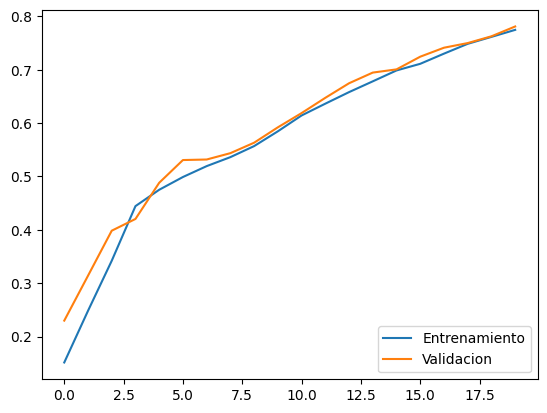

In [24]:
acc = historial.history['accuracy']
val_acc = historial.history['val_accuracy']
loss = historial.history['loss']
val_loss = historial.history['val_loss']

plt.plot(range(20),acc,label='Entrenamiento')
plt.plot(range(20),val_acc,label='Validacion')
plt.legend(loc='lower right')

In [25]:
y_pred = modelo.predict(x_test[:1])
print(list(map('{:.3f}'.format,y_pred[0])))

modelo_probabilidad = tf.keras.Sequential([modelo, tf.keras.layers.Softmax()])
y_pred_proba = modelo_probabilidad.predict(x_test[:1])
print(list(map('{:.3f}'.format,y_pred_proba[0])))

1/1 [==============================] - 0s 53ms/step
['-1.791', '-0.025', '-2.633', '0.720', '1.473', '1.267', '-2.825', '4.255', '1.139', '3.153']
1/1 [==============================] - 0s 75ms/step
['0.002', '0.009', '0.001', '0.019', '0.040', '0.033', '0.001', '0.651', '0.029', '0.216']


In [26]:
y_pred = modelo.predict(x_test)
modelo_probabilidad = tf.keras.Sequential([modelo, tf.keras.layers.Softmax()])
y_pred_proba = modelo_probabilidad.predict(x_test)

313/313 [==============================] - 0s 775us/step


In [27]:
print(list(map('{:.3f}'.format,y_pred[5])))
print(list(map('{:.3f}'.format,y_pred_proba[5])))
print(y_test[5])

['-4.660', '4.510', '0.061', '1.069', '0.024', '-0.276', '-0.178', '1.652', '0.735', '0.555']
['0.000', '0.853', '0.010', '0.027', '0.010', '0.007', '0.008', '0.049', '0.020', '0.016']
1


In [28]:
def plot_example(X, y):
    """Plot the first 5 images and their labels in a row."""
    for i, (img, y) in enumerate(zip(X[:5].reshape(5, 28, 28), y[:5])):
        plt.subplot(151 + i)
        plt.imshow(img)
        plt.xticks([])
        plt.yticks([])
        plt.title(y)